# A data tale of two cities that will make you a better Airbnb host
### Airbnb review rating analysis of the Seattle and Boston datasets from 2016/17 for Udacity Data Science Nanodegree Blog Post Task

# Intro

Reviews are of enormous importance in online marketplaces, nowhere more so than for Airbnb hosts.  Guests are potentially taking a greater risk than if they booked into a well known hotel chain, so the rating for and Airbnb property can give comfort or scare away guests in equal measure.

What actionable steps can hosts take to make sure they are maximising their overall review scores and avoiding the simple mistakes and oversights that can lead to damaging negative reviews?  And, is this the same story whether the property is in Seattle or Boston?

This analysis dives deep into the datasets of both cities to shed light on this important question.  Spoiler alert - there are some very simple steps that can be taken that might make a big improvement in overall review scores.  They might be obvious to those who already do them right, but there are a lot of hosts who would do well to take note and make a few simple changes for some great improvements in their ratings.

# Context

A key overall measure for review ratings is 'review_scores_rating'.  It is a measure out of 100 and gives an overall rating score for each property listing.

Helpfully there are a number of sub-category review scores (e.g. 'value', 'cleanliness') which are measured out of 10, and this analysis looks deeper into those to see if any of them give clues for how to unlock a higher 'review_scores_rating' overall.

There were many other possible avenues of investigation in these datasets.  After some initial exploratory data analysis, this workbook focusses in on the following three business questions for Airbnb hosts.

This project has been prepared as part of my coursework for the Udacity Data Science nanodegree and has an accompanying blog post on Medium.  (Link to follow...).  The data uses the Boston and Seattle Airbnb datasets from Kaggle which contain 7,403 property listings in total from 2016/17.



## Question 1
### What actions can a host take to achieve a better overall rating score?


## Question 2
### From the sub-category review scores, which ones have the strongest impact on overall rating score?



## Question 3
### How do the drivers of overall rating differ by city between Seattle and Boston?

# Load in the libraries and files (Gather)

In [1]:
# Load in the Python libraries required for this analysis

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Kaggle os set up - code not necessary if not importing files direct from Kaggle

#
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/boston/calendar.csv
/kaggle/input/boston/listings.csv
/kaggle/input/boston/reviews.csv
/kaggle/input/seattle/calendar.csv
/kaggle/input/seattle/listings.csv
/kaggle/input/seattle/reviews.csv


In [2]:
# create dataframes for the six csv data tables

df_seattle_calendar = pd.read_csv(r'/kaggle/input/seattle/calendar.csv')
df_seattle_listings = pd.read_csv(r'/kaggle/input/seattle/listings.csv')
df_seattle_reviews = pd.read_csv(r'/kaggle/input/seattle/reviews.csv')
df_boston_calendar = pd.read_csv(r'/kaggle/input/boston/calendar.csv')
df_boston_listings = pd.read_csv(r'/kaggle/input/boston/listings.csv')
df_boston_reviews = pd.read_csv(r'/kaggle/input/boston/reviews.csv')


In [3]:
# check the shape of the listings df and see if the two cities match up

df_seattle_listings.shape

(3818, 92)

In [4]:
df_boston_listings.shape # 3 additional columns in Boston

(3585, 95)

In [5]:
set(df_boston_listings.columns) - set(df_seattle_listings.columns)  # these are the three extra columns

{'access', 'house_rules', 'interaction'}

In [6]:
set(df_seattle_listings.columns) - set(df_boston_listings.columns)  # no extra columns in Seattle

set()

In [7]:
# add city column to the listings to differentiate
df_boston_listings['city2'] = 'BOSTON'  
df_seattle_listings['city2'] = 'SEATTLE'  

In [8]:
# concatenate listings tables
df_list = pd.concat([df_seattle_listings, df_boston_listings])

In [9]:
df_list.shape # new df concat includes all 96 columns from Boston; the 3 'Boston-only' columns will not be useful in city v city comparisons

(7403, 96)

In [10]:
# add city column to the calendar to differentiate
df_boston_calendar['city'] = 'BOSTON'  
df_seattle_calendar['city'] = 'SEATTLE'  

In [11]:
# concatenate calendar tables
df_cal = pd.concat([df_seattle_calendar, df_boston_calendar])
df_cal

,listing_id,date,available,price,city
0,241032,2016-01-04,t,$85.00,SEATTLE
1,241032,2016-01-05,t,$85.00,SEATTLE
2,241032,2016-01-06,f,NaN,SEATTLE
3,241032,2016-01-07,f,NaN,SEATTLE
4,241032,2016-01-08,f,NaN,SEATTLE
...,...,...,...,...,...
1308885,14504422,2016-09-10,f,NaN,BOSTON
1308886,14504422,2016-09-09,f,NaN,BOSTON
1308887,14504422,2016-09-08,f,NaN,BOSTON
1308888,14504422,2016-09-07,f,NaN,BOSTON


In [12]:
df_boston_reviews.shape

(68275, 6)

In [13]:
df_seattle_reviews.shape

(84849, 6)

In [14]:
# add city column to the reviews tables to differentiate
df_boston_reviews['city'] = 'BOSTON'
df_seattle_reviews['city'] = 'SEATTLE'

In [15]:
# concatenate review tables
df_revs = pd.concat([df_seattle_reviews, df_boston_reviews])
df_revs

,listing_id,id,date,reviewer_id,reviewer_name,comments,city
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,SEATTLE
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,SEATTLE
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",SEATTLE
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,SEATTLE
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,SEATTLE
...,...,...,...,...,...,...,...
68270,7462268,80537457,2016-06-18,22034145,Antonio,Joe y su mujer son encantadores. La habitación...,BOSTON
68271,7462268,83640094,2016-07-03,40052513,Steve,Joe was on his way to Jamaica to be married! o...,BOSTON
68272,7462268,85797088,2016-07-13,77129134,Nick,The room was very clean as were the bathrooms ...,BOSTON
68273,7462268,97264637,2016-08-26,15799803,Vid,Staying in Lower Allston at Joe and Nancy's pl...,BOSTON


# Begin Exploratory Data Analysis (Assess)


## CALENDAR table

In [16]:
# calendar table is a list of availability and price data
df_cal 

,listing_id,date,available,price,city
0,241032,2016-01-04,t,$85.00,SEATTLE
1,241032,2016-01-05,t,$85.00,SEATTLE
2,241032,2016-01-06,f,NaN,SEATTLE
3,241032,2016-01-07,f,NaN,SEATTLE
4,241032,2016-01-08,f,NaN,SEATTLE
...,...,...,...,...,...
1308885,14504422,2016-09-10,f,NaN,BOSTON
1308886,14504422,2016-09-09,f,NaN,BOSTON
1308887,14504422,2016-09-08,f,NaN,BOSTON
1308888,14504422,2016-09-07,f,NaN,BOSTON


### Possible business questions emerging part 1 (for long list; to be narrowed later):

* What factors drive the popularity of a property - as indicated by % fully booked?
* What factors affect the price that a property is listed at - based on listing prices (either including the date to bring in seasonality as a factor; or using a fixed date period average as the response variable to avoid seasonality)?
* What dates are particularly popular for this district/city (to bring in Boston data as well to join and compare) in terms of booking availability and price advertised?

In [17]:
df_cal.shape   # it has just over 2.7 million rows and 5 columns

(2702460, 5)

In [18]:
df_cal[df_cal['city'] == 'BOSTON'].shape  # 1.3 million rows for Boston

(1308890, 5)

In [19]:
df_cal[df_cal['city'] == 'SEATTLE'].shape  # 1.4 million rows for Seattle

(1393570, 5)

In [20]:
df_cal.listing_id.nunique()  # it covers 7,403 unique listing id's so 7,403 unique rental properties

7403

In [21]:
print(df_cal.date.max())  # the calendar starts on 4th Jan 2016
print(df_cal.date.min())  # the latest date listed is 5th Sep 2017

2017-09-05
2016-01-04


In [22]:
print(df_cal[df_cal['city'] == 'SEATTLE'].date.min())
print(df_cal[df_cal['city'] == 'SEATTLE'].date.max())
print(df_cal[df_cal['city'] == 'BOSTON'].date.min())
print(df_cal[df_cal['city'] == 'BOSTON'].date.max())

# slightly overlapping periods in the data
# both cities have approximately one year's worth
# boston data is very slightly more recent
# this should not give us any problems as the periods are similar and cover a year, but something to keep in mind in all analysis

2016-01-04
2017-01-02
2016-09-06
2017-09-05


In [23]:
df_cal.isnull().sum()/df_cal.shape[0]    # around 42% of rows have the price missing; no missing values from other columns

listing_id    0.000000
date          0.000000
available     0.000000
price         0.416243
city          0.000000
dtype: float64

In [24]:
df_cal_avail = df_cal[df_cal['available']=='t']  # for rows where the date and listing_id are showing as available there are no missing price

df_cal_avail.isnull().sum()

listing_id    0
date          0
available     0
price         0
city          0
dtype: int64

In [25]:
df_cal_unavail = df_cal[df_cal['available']=='f']  # for rows where the date and listing_id are showing as available there are 100% missing prices

df_cal_unavail.isnull().sum()/df_cal_unavail.shape[0]

listing_id    0.0
date          0.0
available     0.0
price         1.0
city          0.0
dtype: float64

### MISSING VALUES - for the calendar table this is all clear, with no imputing or adjusting required.  The table includes price for all properties on dates that are showing as available and does not include price for any dates that are showing as unavailable.

## LISTINGS table

In [26]:
df_list   # wide table with 96 columns of information about each listing

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,city2,access,interaction,house_rules
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,moderate,f,f,2,4.07,SEATTLE,NaN,NaN,NaN
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,f,strict,t,t,6,1.48,SEATTLE,NaN,NaN,NaN
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,f,strict,f,f,2,1.15,SEATTLE,NaN,NaN,NaN
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,f,flexible,f,f,1,NaN,SEATTLE,NaN,NaN,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,f,strict,f,f,1,0.89,SEATTLE,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,8373729,https://www.airbnb.com/rooms/8373729,20160906204935,2016-09-07,Big cozy room near T,5 min walking to Orange Line subway with 2 sto...,NaN,5 min walking to Orange Line subway with 2 sto...,none,NaN,...,t,strict,f,f,8,0.34,BOSTON,NaN,NaN,1. No damage to the house or furniture 2. No S...
3581,14844274,https://www.airbnb.com/rooms/14844274,20160906204935,2016-09-07,BU Apartment DexterPark Bright room,"Most popular apartment in BU, best located in ...",Best location in BU,"Most popular apartment in BU, best located in ...",none,NaN,...,f,strict,f,f,2,NaN,BOSTON,NaN,NaN,NaN
3582,14585486,https://www.airbnb.com/rooms/14585486,20160906204935,2016-09-07,Gorgeous funky apartment,Funky little apartment close to public transpo...,Modern and relaxed space with many facilities ...,Funky little apartment close to public transpo...,none,"Cambridge is a short walk into Boston, and set...",...,f,flexible,f,f,1,NaN,BOSTON,The whole place including social areas is your...,NaN,NaN
3583,14603878,https://www.airbnb.com/rooms/14603878,20160906204935,2016-09-07,Great Location; Train and Restaurants,"My place is close to Taco Loco Mexican Grill, ...",NaN,"My place is close to Taco Loco Mexican Grill, ...",none,NaN,...,f,strict,f,f,1,2.00,BOSTON,NaN,NaN,NaN


### Possible business questions emerging part 2 (for long list; to be narrowed later):
* REVIEW_SCORES_RATING as response variable

    * What factors have the greatest impact on the review scores rating?
    * Does host response time affect review scores rating?
    * Does length of text written in description affect review scores rating?
    * Does host profile affect review score?  E.g. has_profile_pic, host_about length of text, host_verified etc.
    * Does amenities affect review score rating?  Number of amenities?  Categories of amenities?
    * Does price/cleaning fee etc. affect review score?
    * How does cancellation policy affect review score?
    * Which sub-review scores (i.e. accuracy, cleanliness, checkin etc. have greatest impact on overall review scores rating?
    * How do review scores differ between the two cities?
    
    
    
* CALENDAR_PRICE as response variable

    * What factors affect the price listed?
    * What price should a new property list at?
    * How does location affect price?
    * How do amenities affect price?
    * How do reviews or host status affect price?
    * How does price differ between the two cities?
    * Are there different drivers of price between the two cities?

In [27]:
df_list.shape # 7,403 rows matches the 7,403 figure for unique listings in the calendar table; 96 cols

(7403, 96)

In [28]:
df_list['state'].value_counts()   # shows that we need to use the city2 column for split of dataset

WA    3817
MA    3585
wa       1
Name: state, dtype: int64

In [29]:
df_list.columns  
# full list of 96 column names; most seem self explanatory; want to understand review_scores_rating to see if it is useful overall response variable
# remember last three columns are not present for the Seattle dataset

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

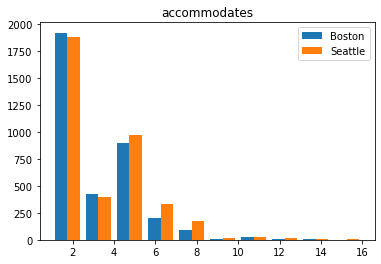

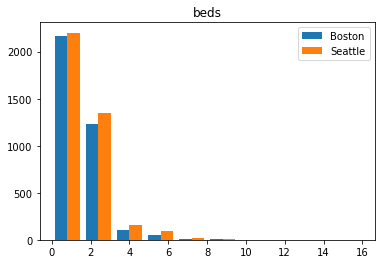

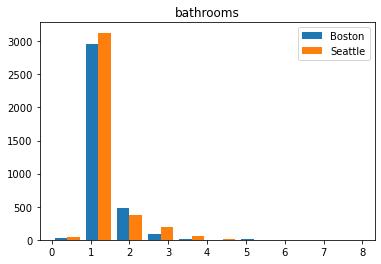

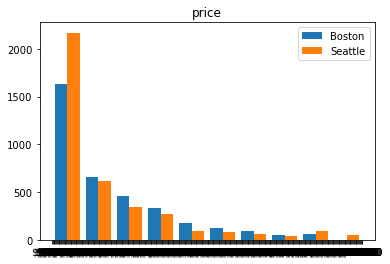

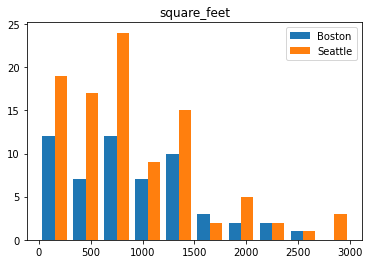

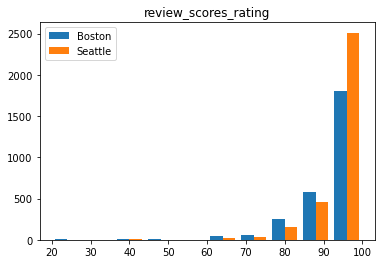

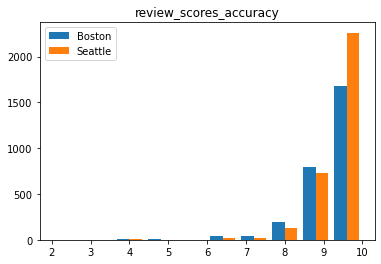

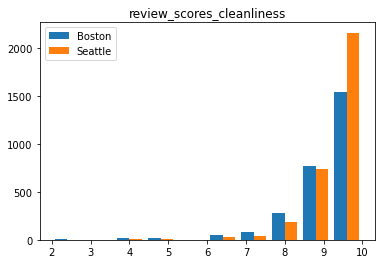

In [30]:
# function to plot some histograms for EDA

def plot_hists(columnlist):
    """
    INPUT
    A list of columns that we want to see side by side histograms for
    
    OUTPUT
    Histograms on shared axes for the two cities
    """
    
    for col in columnlist:
        boston = df_list[df_list['city2'] == 'BOSTON'][col]
        seattle = df_list[df_list['city2'] == 'SEATTLE'][col]
        plt.hist([boston, seattle], label=['Boston', 'Seattle']) 
        plt.title(col)
        plt.legend()
        plt.show()
        
columnlist = ['accommodates', 'beds', 'bathrooms', 'price', 'square_feet', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness']
plot_hists(columnlist)

In [31]:
# pivot tables for the categorical variables - impact on overall rating

pd.pivot_table(df_list, values='review_scores_rating', index='host_response_time', columns='city2', aggfunc='mean')

city2,BOSTON,SEATTLE
host_response_time,,
a few days or more,90.181818,87.793103
within a day,93.207349,94.264831
within a few hours,91.403275,93.812425
within an hour,92.190273,95.143984


## REVIEWS table

In [32]:
df_revs # text based view of the reviews left by guests

,listing_id,id,date,reviewer_id,reviewer_name,comments,city
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,SEATTLE
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,SEATTLE
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",SEATTLE
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,SEATTLE
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,SEATTLE
...,...,...,...,...,...,...,...
68270,7462268,80537457,2016-06-18,22034145,Antonio,Joe y su mujer son encantadores. La habitación...,BOSTON
68271,7462268,83640094,2016-07-03,40052513,Steve,Joe was on his way to Jamaica to be married! o...,BOSTON
68272,7462268,85797088,2016-07-13,77129134,Nick,The room was very clean as were the bathrooms ...,BOSTON
68273,7462268,97264637,2016-08-26,15799803,Vid,Staying in Lower Allston at Joe and Nancy's pl...,BOSTON


### Possible business questions emerging part 3 (for long list; to be narrowed later):
* REVIEW_SCORES_RATING as response variable

    * What keywords from the comments stand out as being linked to high and low review scores?
    * What keywords from the comments stand out as difference between the two cities?
    
    
    
* CALENDAR_PRICE as response variable

    * What keywords from the comments stand out as being linked to high and low price listings?

In [33]:
df_revs.shape  # nearly 153 thousand rows of reviews for the 7 columns

(153124, 7)

In [34]:
df_revs.listing_id.nunique() # based on 6,020 unique listing id's - this lines up with the number of listings that have more than zero reviews

6020

In [35]:
df_revs.listing_id.nunique()/df_list.shape[0]  # shows us that 81.3% of listings have at least one review

0.8131838443874105

In [36]:
df_list_with_reviews = df_list[df_list.number_of_reviews > 0]  # check how many listings have more than zero reviews
df_list_with_reviews.shape

(6020, 96)

# Framing the Business Questions

## Question 1

What actions can a host take to achieve a better overall rating score?

## Question 2

From the sub-category review scores, which ones have the strongest impact on overall rating score?

## Question 3

How do the drivers of overall rating differ by city between Seattle and Boston?

#### NB there are clearly a vast number of other questions that could be asked of this dataset.  Some of these were suggested in the EDA phase and could be explored at another time, but for this analysis we will focus on the three questions above only.

# Data Cleaning Stage (Clean)

In [37]:
df_list.isnull() # a matrix showing which data has null or NaN values that will need removing or imputing before a model is run

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,city2,access,interaction,house_rules
0,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
3,False,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,True,False,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,False,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,True,True,False
3581,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,True,True,True
3582,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
3583,False,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,True,True,True


In [38]:
# understand the split of categorical and numerical variables

df_list.dtypes.value_counts()

object     66
float64    17
int64      13
dtype: int64

In [39]:
# list of datatypes

df_list.dtypes

id                     int64
listing_url           object
scrape_id              int64
last_scraped          object
name                  object
                      ...   
reviews_per_month    float64
city2                 object
access                object
interaction           object
house_rules           object
Length: 96, dtype: object

In [40]:
# create a list of the numerical variables columns to use later

list_num_vars = list(df_list.select_dtypes(include=['int64', 'float64']).columns)

list_num_vars

['id',
 'scrape_id',
 'host_id',
 'host_listings_count',
 'host_total_listings_count',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'square_feet',
 'guests_included',
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'license',
 'calculated_host_listings_count',
 'reviews_per_month']

In [41]:
# create a list of the categorical columns to use later

list_cat_vars = list(df_list.select_dtypes(include=['object']).columns)
list_cat_vars

['listing_url',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'is_location_exact',
 'property_type',
 'room_type',
 'bed_type',
 'amenities',
 'price',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'extra_people',
 'calendar_updated',
 'has_availability',
 'calendar_last_scraped',
 'first_review',
 'last_review',
 'require

In [42]:
# how many rows for the response variable have errors

df_list.review_scores_rating.isnull().sum()

1460

In [43]:
# what proportion of the dataset does this affect

df_list.review_scores_rating.isnull().sum() / df_list.shape[0]

# nearly 20% have no figure for review_scores_rating - but these all need to be removed as the response variable must not be blank and should not be imputed

0.1972173443198703

In [44]:
# create new df list clean that removes the empty rows for response variable

df_list_clean = df_list.dropna(subset=['review_scores_rating'], axis=0)
df_list_clean

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,city2,access,interaction,house_rules
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,moderate,f,f,2,4.07,SEATTLE,NaN,NaN,NaN
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,f,strict,t,t,6,1.48,SEATTLE,NaN,NaN,NaN
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,f,strict,f,f,2,1.15,SEATTLE,NaN,NaN,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,f,strict,f,f,1,0.89,SEATTLE,NaN,NaN,NaN
5,5956968,https://www.airbnb.com/rooms/5956968,20160104002432,2016-01-04,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,If you include a bit of your background in you...,We're renting out a small private unit of one ...,none,This part of Queen Anne has wonderful views an...,...,f,strict,f,f,1,2.45,SEATTLE,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3574,14743129,https://www.airbnb.com/rooms/14743129,20160906204935,2016-09-07,Hancock Village rent out one room,"我的房源走路2 minutes有shopping mall,包括CVS,restuarant...",NaN,"我的房源走路2 minutes有shopping mall,包括CVS,restuarant...",none,"走路2 minutes有shopping mall,包括CVS,restuarant,ban...",...,f,moderate,f,f,2,1.00,BOSTON,NaN,NaN,NaN
3575,5280827,https://www.airbnb.com/rooms/5280827,20160906204935,2016-09-07,Private cozy room,"Cozy room near T station. 5 min walking to T, ...",NaN,"Cozy room near T station. 5 min walking to T, ...",none,NaN,...,t,strict,f,f,8,0.33,BOSTON,NaN,NaN,1. No damage to the house or furniture 2. No S...
3578,14536322,https://www.airbnb.com/rooms/14536322,20160906204935,2016-09-07,Victorian Garden Level Room - Omega,Exquisite garden level (semi basement) room in...,"Very safe, bustling with shops, restaurants, H...",Exquisite garden level (semi basement) room in...,none,"Safe, in the midst of all Harvard Square actio...",...,t,strict,f,f,2,2.00,BOSTON,"Access to kitchen, relaxing private side and b...","Sparingly, as my wife and I are both busy prof...",NaN
3580,8373729,https://www.airbnb.com/rooms/8373729,20160906204935,2016-09-07,Big cozy room near T,5 min walking to Orange Line subway with 2 sto...,NaN,5 min walking to Orange Line subway with 2 sto...,none,NaN,...,t,strict,f,f,8,0.34,BOSTON,NaN,NaN,1. No damage to the house or furniture 2. No S...


In [45]:
print(7403-1460)
df_list_clean.shape # checking this df is shorter than the original df by 1,460 rows.  It has 5,943 rows so this is correct.

5943


(5943, 96)

In [46]:
# check how many nulls

pd.set_option('display.max_rows',100)
df_list_clean.isnull().sum()

id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   0
summary                              295
space                               1002
description                            0
experiences_offered                    0
neighborhood_overview               1698
notes                               2568
transit                             1513
thumbnail_url                        734
medium_url                           734
picture_url                            0
xl_picture_url                       734
host_id                                0
host_url                               0
host_name                              0
host_since                             0
host_location                          9
host_about                          1441
host_response_time                   532
host_response_rate                   532
host_acceptance_

In [47]:
# check nulls by % of total (filtered where more than 30% of rows are nulls)

cols_to_drop = (df_list_clean.isnull().sum()/df_list_clean.shape[0])[df_list_clean.isnull().sum()/df_list_clean.shape[0] > 0.3]
cols_to_drop

notes                           0.432105
neighbourhood_group_cleansed    0.466431
square_feet                     0.975770
weekly_price                    0.560660
monthly_price                   0.638903
security_deposit                0.540636
has_availability                0.466431
license                         1.000000
jurisdiction_names              0.466431
access                          0.696618
interaction                     0.708396
house_rules                     0.658422
dtype: float64

In [48]:
# create a list of these cols to drop

list_cols_to_drop = list(cols_to_drop.index)

In [49]:
# drop these columns

df_list_clean = df_list_clean.drop(list_cols_to_drop, axis=1)
df_list_clean

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,city2
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,9.0,10.0,f,f,moderate,f,f,2,4.07,SEATTLE
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,10.0,f,f,strict,t,t,6,1.48,SEATTLE
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,10.0,f,f,strict,f,f,2,1.15,SEATTLE
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,9.0,f,f,strict,f,f,1,0.89,SEATTLE
5,5956968,https://www.airbnb.com/rooms/5956968,20160104002432,2016-01-04,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,If you include a bit of your background in you...,We're renting out a small private unit of one ...,none,This part of Queen Anne has wonderful views an...,...,10.0,10.0,f,f,strict,f,f,1,2.45,SEATTLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3574,14743129,https://www.airbnb.com/rooms/14743129,20160906204935,2016-09-07,Hancock Village rent out one room,"我的房源走路2 minutes有shopping mall,包括CVS,restuarant...",NaN,"我的房源走路2 minutes有shopping mall,包括CVS,restuarant...",none,"走路2 minutes有shopping mall,包括CVS,restuarant,ban...",...,10.0,8.0,f,f,moderate,f,f,2,1.00,BOSTON
3575,5280827,https://www.airbnb.com/rooms/5280827,20160906204935,2016-09-07,Private cozy room,"Cozy room near T station. 5 min walking to T, ...",NaN,"Cozy room near T station. 5 min walking to T, ...",none,NaN,...,8.0,7.0,f,t,strict,f,f,8,0.33,BOSTON
3578,14536322,https://www.airbnb.com/rooms/14536322,20160906204935,2016-09-07,Victorian Garden Level Room - Omega,Exquisite garden level (semi basement) room in...,"Very safe, bustling with shops, restaurants, H...",Exquisite garden level (semi basement) room in...,none,"Safe, in the midst of all Harvard Square actio...",...,10.0,10.0,f,t,strict,f,f,2,2.00,BOSTON
3580,8373729,https://www.airbnb.com/rooms/8373729,20160906204935,2016-09-07,Big cozy room near T,5 min walking to Orange Line subway with 2 sto...,NaN,5 min walking to Orange Line subway with 2 sto...,none,NaN,...,8.0,9.0,f,t,strict,f,f,8,0.34,BOSTON


In [50]:
# check nulls by % of total

df_list_clean.isnull().sum() / df_list_clean.shape[0]


id                                  0.000000
listing_url                         0.000000
scrape_id                           0.000000
last_scraped                        0.000000
name                                0.000000
summary                             0.049638
space                               0.168602
description                         0.000000
experiences_offered                 0.000000
neighborhood_overview               0.285714
transit                             0.254585
thumbnail_url                       0.123507
medium_url                          0.123507
picture_url                         0.000000
xl_picture_url                      0.123507
host_id                             0.000000
host_url                            0.000000
host_name                           0.000000
host_since                          0.000000
host_location                       0.001514
host_about                          0.242470
host_response_time                  0.089517
host_respo

In [51]:
# fill mean values to replace errors for all numerical columns

fill_mean = lambda col: col.fillna(col.mean()) if col.name in list_num_vars else col       # lambda function to apply to all num_var columns with missing values

df_list_clean = df_list_clean.apply(fill_mean)

df_list_clean

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,city2
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,9.0,10.0,f,f,moderate,f,f,2,4.07,SEATTLE
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,10.0,f,f,strict,t,t,6,1.48,SEATTLE
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,10.0,f,f,strict,f,f,2,1.15,SEATTLE
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,9.0,f,f,strict,f,f,1,0.89,SEATTLE
5,5956968,https://www.airbnb.com/rooms/5956968,20160104002432,2016-01-04,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,If you include a bit of your background in you...,We're renting out a small private unit of one ...,none,This part of Queen Anne has wonderful views an...,...,10.0,10.0,f,f,strict,f,f,1,2.45,SEATTLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3574,14743129,https://www.airbnb.com/rooms/14743129,20160906204935,2016-09-07,Hancock Village rent out one room,"我的房源走路2 minutes有shopping mall,包括CVS,restuarant...",NaN,"我的房源走路2 minutes有shopping mall,包括CVS,restuarant...",none,"走路2 minutes有shopping mall,包括CVS,restuarant,ban...",...,10.0,8.0,f,f,moderate,f,f,2,1.00,BOSTON
3575,5280827,https://www.airbnb.com/rooms/5280827,20160906204935,2016-09-07,Private cozy room,"Cozy room near T station. 5 min walking to T, ...",NaN,"Cozy room near T station. 5 min walking to T, ...",none,NaN,...,8.0,7.0,f,t,strict,f,f,8,0.33,BOSTON
3578,14536322,https://www.airbnb.com/rooms/14536322,20160906204935,2016-09-07,Victorian Garden Level Room - Omega,Exquisite garden level (semi basement) room in...,"Very safe, bustling with shops, restaurants, H...",Exquisite garden level (semi basement) room in...,none,"Safe, in the midst of all Harvard Square actio...",...,10.0,10.0,f,t,strict,f,f,2,2.00,BOSTON
3580,8373729,https://www.airbnb.com/rooms/8373729,20160906204935,2016-09-07,Big cozy room near T,5 min walking to Orange Line subway with 2 sto...,NaN,5 min walking to Orange Line subway with 2 sto...,none,NaN,...,8.0,9.0,f,t,strict,f,f,8,0.34,BOSTON


In [52]:
# get dummies for categorical variables, but only if fewer than 50 categories

list_cat_cols_below50 = []   # blank list to capture cat cols below 50 categories

for i in df_list_clean.filter(list_cat_vars).columns:
    if len(df_list_clean[i].value_counts()) < 50:
        list_cat_cols_below50.append(i)
        
list_cat_cols_below50

df_list_clean = pd.get_dummies(df_list_clean, columns=list_cat_cols_below50, dummy_na=True)

df_list_clean


,id,listing_url,scrape_id,name,summary,space,description,neighborhood_overview,transit,thumbnail_url,...,cancellation_policy_nan,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_profile_picture_nan,require_guest_phone_verification_f,require_guest_phone_verification_t,require_guest_phone_verification_nan,city2_BOSTON,city2_SEATTLE,city2_nan
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,...,0,1,0,0,1,0,0,0,1,0
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...","Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,...,0,0,1,0,0,1,0,0,1,0
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,A bus stop is just 2 blocks away. Easy bus a...,NaN,...,0,1,0,0,1,0,0,0,1,0
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,We are in the beautiful neighborhood of Queen ...,The nearest public transit bus (D Line) is 2 b...,NaN,...,0,1,0,0,1,0,0,0,1,0
5,5956968,https://www.airbnb.com/rooms/5956968,20160104002432,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,If you include a bit of your background in you...,We're renting out a small private unit of one ...,This part of Queen Anne has wonderful views an...,The #1 and #2 bus picks up 2-3 blocks away (di...,https://a2.muscache.com/ac/pictures/84791950/f...,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3574,14743129,https://www.airbnb.com/rooms/14743129,20160906204935,Hancock Village rent out one room,"我的房源走路2 minutes有shopping mall,包括CVS,restuarant...",NaN,"我的房源走路2 minutes有shopping mall,包括CVS,restuarant...","走路2 minutes有shopping mall,包括CVS,restuarant,ban...","走4 minutes 到51的bus station,十几分钟到orange line和gr...",https://a2.muscache.com/im/pictures/cc129367-2...,...,0,1,0,0,1,0,0,1,0,0
3575,5280827,https://www.airbnb.com/rooms/5280827,20160906204935,Private cozy room,"Cozy room near T station. 5 min walking to T, ...",NaN,"Cozy room near T station. 5 min walking to T, ...",NaN,NaN,https://a2.muscache.com/im/pictures/116bc87c-8...,...,0,1,0,0,1,0,0,1,0,0
3578,14536322,https://www.airbnb.com/rooms/14536322,20160906204935,Victorian Garden Level Room - Omega,Exquisite garden level (semi basement) room in...,"Very safe, bustling with shops, restaurants, H...",Exquisite garden level (semi basement) room in...,"Safe, in the midst of all Harvard Square actio...","Buses, Subway train, city bicycles.",https://a2.muscache.com/im/pictures/11863155-6...,...,0,1,0,0,1,0,0,1,0,0
3580,8373729,https://www.airbnb.com/rooms/8373729,20160906204935,Big cozy room near T,5 min walking to Orange Line subway with 2 sto...,NaN,5 min walking to Orange Line subway with 2 sto...,NaN,NaN,https://a2.muscache.com/im/pictures/809e828a-c...,...,0,1,0,0,1,0,0,1,0,0


In [53]:
# take a look at remaining null row proportions to decide whether to clean or drop

pd.set_option('display.max_rows', 300)
(df_list_clean.isnull().sum() / df_list_clean.shape[0]) [df_list_clean.isnull().sum() / df_list_clean.shape[0] > 0]



summary                  0.049638
space                    0.168602
neighborhood_overview    0.285714
transit                  0.254585
thumbnail_url            0.123507
medium_url               0.123507
xl_picture_url           0.123507
host_location            0.001514
host_about               0.242470
host_response_rate       0.089517
host_acceptance_rate     0.117281
host_neighbourhood       0.075383
neighbourhood            0.119300
zipcode                  0.005216
cleaning_fee             0.260979
dtype: float64

In [54]:
# from the list of remaining nulls - these columns will be dropped as they would likely add little value to the model

cols_to_drop = ['summary', 'neighborhood_overview', 'transit', 'thumbnail_url', 'medium_url', 'xl_picture_url', 'host_about']

df_list_clean = df_list_clean.drop(cols_to_drop, axis=1)

In [55]:
# remaining columns with nulls

df_list_clean.isnull().sum() [df_list_clean.isnull().sum() >0]

space                   1002
host_location              9
host_response_rate       532
host_acceptance_rate     697
host_neighbourhood       448
neighbourhood            709
zipcode                   31
cleaning_fee            1551
dtype: int64

In [56]:
# for remaining columns, which might be of use, we will fill with mode

mode_fill_cols = list((df_list_clean.isnull().sum() [df_list_clean.isnull().sum() >0]).index)

fill_mode = lambda col: col.fillna(col.mode()[0]) if col.name in mode_fill_cols else col    # lambda function to apply to all mode fill columns with missing values

df_list_clean = df_list_clean.apply(fill_mode)

df_list_clean




,id,listing_url,scrape_id,name,space,description,picture_url,host_id,host_url,host_name,...,cancellation_policy_nan,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_profile_picture_nan,require_guest_phone_verification_f,require_guest_phone_verification_t,require_guest_phone_verification_nan,city2_BOSTON,city2_SEATTLE,city2_nan
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,Stylish Queen Anne Apartment,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,https://a1.muscache.com/ac/pictures/67560560/c...,956883,https://www.airbnb.com/users/show/956883,Maija,...,0,1,0,0,1,0,0,0,1,0
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,Bright & Airy Queen Anne Apartment,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,...,0,0,1,0,0,1,0,0,1,0
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,New Modern House-Amazing water view,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,https://a2.muscache.com/ac/pictures/b4324e0f-a...,16708587,https://www.airbnb.com/users/show/16708587,Jill,...,0,1,0,0,1,0,0,0,1,0
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,https://a1.muscache.com/ac/pictures/6120468/b0...,1452570,https://www.airbnb.com/users/show/1452570,Emily,...,0,1,0,0,1,0,0,0,1,0
5,5956968,https://www.airbnb.com/rooms/5956968,20160104002432,Private unit in a 1920s mansion,If you include a bit of your background in you...,We're renting out a small private unit of one ...,https://a2.muscache.com/ac/pictures/84791950/f...,326758,https://www.airbnb.com/users/show/326758,Andrew,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3574,14743129,https://www.airbnb.com/rooms/14743129,20160906204935,Hancock Village rent out one room,The studio's kitchenette comes equipped with a...,"我的房源走路2 minutes有shopping mall,包括CVS,restuarant...",https://a2.muscache.com/im/pictures/cc129367-2...,91855319,https://www.airbnb.com/users/show/91855319,公主,...,0,1,0,0,1,0,0,1,0,0
3575,5280827,https://www.airbnb.com/rooms/5280827,20160906204935,Private cozy room,The studio's kitchenette comes equipped with a...,"Cozy room near T station. 5 min walking to T, ...",https://a2.muscache.com/im/pictures/116bc87c-8...,19246369,https://www.airbnb.com/users/show/19246369,Joe,...,0,1,0,0,1,0,0,1,0,0
3578,14536322,https://www.airbnb.com/rooms/14536322,20160906204935,Victorian Garden Level Room - Omega,"Very safe, bustling with shops, restaurants, H...",Exquisite garden level (semi basement) room in...,https://a2.muscache.com/im/pictures/11863155-6...,78459716,https://www.airbnb.com/users/show/78459716,Charles,...,0,1,0,0,1,0,0,1,0,0
3580,8373729,https://www.airbnb.com/rooms/8373729,20160906204935,Big cozy room near T,The studio's kitchenette comes equipped with a...,5 min walking to Orange Line subway with 2 sto...,https://a2.muscache.com/im/pictures/809e828a-c...,19246369,https://www.airbnb.com/users/show/19246369,Joe,...,0,1,0,0,1,0,0,1,0,0


In [57]:
# check if all columns are now showing zero nulls - ready for modelling

np.sum(df_list_clean.isnull().sum())

0

# Further analysis before modelling (Analyze)

In [58]:
# looking at pre-cleaned df how does each factor appear to affect the response variable - superhost

pd.pivot_table(df_list, values='review_scores_rating', columns='city2', index='host_is_superhost', aggfunc='mean')

city2,BOSTON,SEATTLE
host_is_superhost,,
f,91.061817,93.652893
t,97.076142,97.395473


Super Host status appears to be strongly linked to higher rating - but this could be self-fulfilling (ie. to become a superhost a high rating is required).  Seattle non-superhosts score better than Boston.

In [59]:
# looking at pre-cleaned df how does each factor appear to affect the response variable - host has profile pic

pd.pivot_table(df_list, values='review_scores_rating', columns='city2', index='host_has_profile_pic', aggfunc='mean')

city2,BOSTON,SEATTLE
host_has_profile_pic,,
f,95.571429,97.800000
t,91.907414,94.534112


Profile pic seems to be negatively related to review scores - this is unexpected and may impact the model.  Same pattern in both cities - Seattle no profile pic hosts have very high ratings.

In [60]:
# looking at pre-cleaned df how does each factor appear to affect the response variable - host response time

pd.pivot_table(df_list, values='review_scores_rating', columns='city2', index='host_response_time', aggfunc='mean')

city2,BOSTON,SEATTLE
host_response_time,,
a few days or more,90.181818,87.793103
within a day,93.207349,94.264831
within a few hours,91.403275,93.812425
within an hour,92.190273,95.143984


Not too much impact as long as response at least within a day, but longer than that seems to have a large penalty - the penalty being much greater in Seattle.

In [61]:
# looking at pre-cleaned df how does each factor appear to affect the response variable - room type

pd.pivot_table(df_list, values='review_scores_rating', columns='city2', index='room_type', aggfunc='mean')

city2,BOSTON,SEATTLE
room_type,,
Entire home/apt,92.331505,94.477647
Private room,91.338590,94.802935
Shared room,90.830189,93.228261


Shared room very slightly lower scores in both cities.  Otherwise not appearing to be a strong factor.

# Modelling (Model)


## A linear regression model will be used to see what predictions can be made for Review Rating Score and what factors drive this.  First using the data overall and then looking at each city individually.

In [62]:
# import sklearn libraries

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder


In [63]:
df_list_clean.dtypes.value_counts()

uint8      204
object      25
float64     15
int64       13
dtype: int64

In [64]:

def run_pipeline(feature_list):
    """
    Creates a pipeline to generate r2 scores on a linear regression model, enabling iteration over multiple feature lists
    
    INPUT
    A single feature list of any length that we want to use as the X dataframe for explanatory variables
    
    OUTPUT
    A single R Squared score for the accuracy of the y_test_preds against the y_test dataset
    
    """

    # split dataframe in X and y explanatory and response variables

    X = df_list_clean.drop(columns=['review_scores_rating'], axis=1)
    y = df_list_clean['review_scores_rating']
    
    # trim X down to feature list only
    
    
    X = X[feature_list]      # for the feature_list argument passed to this function
    
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)    # split into train and test

    lm_model = LinearRegression(normalize=True)    # instantiate model

    lm_model.fit(X_train, y_train)    # fit model

    y_test_preds = lm_model.predict(X_test)    # predict using the model

    score = r2_score(y_test, y_test_preds)      # score the model
    
    return score

Explanatory note - for the building of the feature matrix below I ran through a few iterations and manually appended the best performing feature to the list.  Each iteration works out the best item for 'i' which is the next to append to the list.  This is more manual than I would like, but it helped me to work through each example and see how the feature list could be tuned by adding on item each iteration.

In [65]:
list(df_list_clean.columns)

['id',
 'listing_url',
 'scrape_id',
 'name',
 'space',
 'description',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_response_rate',
 'host_acceptance_rate',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'zipcode',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'calculated_host_listings_count',
 'reviews_per_month',


In [66]:
# generate feature matrix (list of lists)

numeric_cols = df_list_clean.select_dtypes(include=['int64', 'uint8', 'float64'])   # create a df of the numeric cols
numeric_cols = numeric_cols.drop(columns=['review_scores_rating'], axis=1)      # drop the response variable from this df

num_cols_list = list(numeric_cols.columns)     # turn the df into a list of column names

feature_matrix = []         


# for loop to generate a list of lists - for each column for 'i' - to be passed to the pipeline for scoring

for i in num_cols_list[1:]:                                  
    feature_matrix.append(
                            [
                            'review_scores_value', 
                            'review_scores_cleanliness', 
                            'review_scores_checkin', 
                            'review_scores_location', 
                            'review_scores_accuracy',
                            'reviews_per_month',
                            'host_identity_verified_t',
                            'review_scores_communication',
                            'bedrooms',
                            'room_type_Entire home/apt',
                            'property_type_Loft',
                            'calendar_updated_4 months ago',
                            'calendar_updated_4 weeks ago',
                            'require_guest_phone_verification_t',
                            'calendar_updated_2 days ago',
                            'property_type_Other',
                            'calendar_updated_7 months ago',
                            'host_listings_count',
                            'host_response_time_a few days or more',
                            i,
                            ]
                        )

feature_matrix




[['review_scores_value',
  'review_scores_cleanliness',
  'review_scores_checkin',
  'review_scores_location',
  'review_scores_accuracy',
  'reviews_per_month',
  'host_identity_verified_t',
  'review_scores_communication',
  'bedrooms',
  'room_type_Entire home/apt',
  'property_type_Loft',
  'calendar_updated_4 months ago',
  'calendar_updated_4 weeks ago',
  'require_guest_phone_verification_t',
  'calendar_updated_2 days ago',
  'property_type_Other',
  'calendar_updated_7 months ago',
  'host_listings_count',
  'host_response_time_a few days or more',
  'scrape_id'],
 ['review_scores_value',
  'review_scores_cleanliness',
  'review_scores_checkin',
  'review_scores_location',
  'review_scores_accuracy',
  'reviews_per_month',
  'host_identity_verified_t',
  'review_scores_communication',
  'bedrooms',
  'room_type_Entire home/apt',
  'property_type_Loft',
  'calendar_updated_4 months ago',
  'calendar_updated_4 weeks ago',
  'require_guest_phone_verification_t',
  'calendar_updat

In [67]:
# create a dataframe ready to capture scores from the feature list and populate that df with the feature list and the score

outputs = pd.DataFrame({'feature_list':[], 'score':[]})

i=0

for n in feature_matrix:
    score = run_pipeline(n)
    outputs.loc[i] = np.array([n, score], dtype=object)
    i+=1

In [68]:
# examine the feature list with the highest r squared score from the test

list(outputs.sort_values('score', ascending=False).head(1).feature_list)

[['review_scores_value',
  'review_scores_cleanliness',
  'review_scores_checkin',
  'review_scores_location',
  'review_scores_accuracy',
  'reviews_per_month',
  'host_identity_verified_t',
  'review_scores_communication',
  'bedrooms',
  'room_type_Entire home/apt',
  'property_type_Loft',
  'calendar_updated_4 months ago',
  'calendar_updated_4 weeks ago',
  'require_guest_phone_verification_t',
  'calendar_updated_2 days ago',
  'property_type_Other',
  'calendar_updated_7 months ago',
  'host_listings_count',
  'host_response_time_a few days or more',
  'review_scores_cleanliness']]

In [69]:
# view the scoring dataframe, sorted by highest score first

outputs.sort_values('score', ascending=False)

,feature_list,score
19,"[review_scores_value, review_scores_cleanlines...",0.722510
202,"[review_scores_value, review_scores_cleanlines...",0.722100
37,"[review_scores_value, review_scores_cleanlines...",0.722076
36,"[review_scores_value, review_scores_cleanlines...",0.722076
194,"[review_scores_value, review_scores_cleanlines...",0.722068
18,"[review_scores_value, review_scores_cleanlines...",0.722063
168,"[review_scores_value, review_scores_cleanlines...",0.721997
186,"[review_scores_value, review_scores_cleanlines...",0.721996
33,"[review_scores_value, review_scores_cleanlines...",0.721963
113,"[review_scores_value, review_scores_cleanlines...",0.721963


In [70]:
# run model once for highest performing feature set

feature_list_best = ['review_scores_value', 
                'review_scores_cleanliness', 
                'review_scores_checkin', 
                'review_scores_location', 
                'review_scores_accuracy',
                'reviews_per_month',
                'host_identity_verified_t',
                'review_scores_communication',
                'bedrooms',
                'room_type_Entire home/apt',
                'property_type_Loft',
                'calendar_updated_4 months ago',
                'calendar_updated_4 weeks ago',
                'require_guest_phone_verification_t',
                'calendar_updated_2 days ago',
                'property_type_Other',
                'calendar_updated_7 months ago',
                'host_listings_count',
                'host_response_time_a few days or more',
               ]



# split dataframe in X and y explanatory and response variables

X_best = df_list_clean.drop(columns=['review_scores_rating'], axis=1)
y = df_list_clean['review_scores_rating']

# trim X down to feature list only


X_best = X_best[feature_list_best]      # for the feature_list argument passed to this function


X_best_train, X_best_test, y_train, y_test = train_test_split(X_best, y, test_size=.30, random_state=42)    # split into train and test

lm_model = LinearRegression(normalize=True)    # instantiate model

lm_model.fit(X_best_train, y_train)    # fit model

y_test_preds = lm_model.predict(X_best_test)    # predict using the model

score = r2_score(y_test, y_test_preds)      # score the model

print(score)





0.7218757210098463


In [71]:
# which features have a stronger weighting on the model - using coefficients?

def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_best_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
0,review_scores_value,2.816938,2.816938
1,review_scores_cleanliness,2.585388,2.585388
7,review_scores_communication,1.780189,1.780189
4,review_scores_accuracy,1.761997,1.761997
10,property_type_Loft,1.428051,1.428051
2,review_scores_checkin,1.171461,1.171461
15,property_type_Other,0.917743,0.917743
3,review_scores_location,0.662403,0.662403
11,calendar_updated_4 months ago,-0.642686,0.642686
18,host_response_time_a few days or more,-0.581515,0.581515


In [72]:
pd.pivot_table(df_list, index='review_scores_value', columns='city2', values='review_scores_rating', aggfunc='mean').sort_values('review_scores_value', ascending=False)

city2,BOSTON,SEATTLE
review_scores_value,,
10.0,97.288020,97.300845
9.0,91.767257,93.084433
8.0,83.365269,84.905263
7.0,71.725490,73.973684
6.0,68.041667,72.187500
5.0,48.500000,40.000000
4.0,44.416667,55.000000
3.0,40.000000,NaN
2.0,42.857143,20.000000


In [73]:
pd.pivot_table(df_list, index='review_scores_cleanliness', columns='city2', values='review_scores_rating', aggfunc='mean').sort_values('review_scores_cleanliness', ascending=False)

city2,BOSTON,SEATTLE
review_scores_cleanliness,,
10.0,96.112192,96.672837
9.0,90.831824,92.327027
8.0,85.363309,86.777174
7.0,78.487179,80.400000
6.0,69.744681,73.500000
5.0,65.571429,70.800000
4.0,63.157895,52.500000
3.0,45.000000,40.000000
2.0,37.384615,NaN


In [74]:
df_list_clean[df_list_clean.city2_BOSTON == True]

,id,listing_url,scrape_id,name,space,description,picture_url,host_id,host_url,host_name,...,cancellation_policy_nan,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_profile_picture_nan,require_guest_phone_verification_f,require_guest_phone_verification_t,require_guest_phone_verification_nan,city2_BOSTON,city2_SEATTLE,city2_nan
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,Charming room in pet friendly apt,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,...,0,1,0,0,1,0,0,1,0,0
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",https://a2.muscache.com/im/pictures/6ae8335d-9...,16701,https://www.airbnb.com/users/show/16701,Phil,...,0,0,1,0,1,0,0,1,0,0
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,Spacious Sunny Bedroom Suite in Historic Home,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,https://a2.muscache.com/im/pictures/39764190-1...,6031442,https://www.airbnb.com/users/show/6031442,Meghna,...,0,1,0,0,1,0,0,1,0,0
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,Come Home to Boston,"Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",https://a1.muscache.com/im/pictures/97154760/8...,15396970,https://www.airbnb.com/users/show/15396970,Linda,...,0,1,0,0,1,0,0,1,0,0
5,12386020,https://www.airbnb.com/rooms/12386020,20160906204935,Private Bedroom + Great Coffee,Our sunny condo is located on the second and t...,Super comfy bedroom plus your own bathroom in ...,https://a2.muscache.com/im/pictures/930c78b2-f...,64200298,https://www.airbnb.com/users/show/64200298,Deborah,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3574,14743129,https://www.airbnb.com/rooms/14743129,20160906204935,Hancock Village rent out one room,The studio's kitchenette comes equipped with a...,"我的房源走路2 minutes有shopping mall,包括CVS,restuarant...",https://a2.muscache.com/im/pictures/cc129367-2...,91855319,https://www.airbnb.com/users/show/91855319,公主,...,0,1,0,0,1,0,0,1,0,0
3575,5280827,https://www.airbnb.com/rooms/5280827,20160906204935,Private cozy room,The studio's kitchenette comes equipped with a...,"Cozy room near T station. 5 min walking to T, ...",https://a2.muscache.com/im/pictures/116bc87c-8...,19246369,https://www.airbnb.com/users/show/19246369,Joe,...,0,1,0,0,1,0,0,1,0,0
3578,14536322,https://www.airbnb.com/rooms/14536322,20160906204935,Victorian Garden Level Room - Omega,"Very safe, bustling with shops, restaurants, H...",Exquisite garden level (semi basement) room in...,https://a2.muscache.com/im/pictures/11863155-6...,78459716,https://www.airbnb.com/users/show/78459716,Charles,...,0,1,0,0,1,0,0,1,0,0
3580,8373729,https://www.airbnb.com/rooms/8373729,20160906204935,Big cozy room near T,The studio's kitchenette comes equipped with a...,5 min walking to Orange Line subway with 2 sto...,https://a2.muscache.com/im/pictures/809e828a-c...,19246369,https://www.airbnb.com/users/show/19246369,Joe,...,0,1,0,0,1,0,0,1,0,0


In [75]:
# run model once for highest performing feature set - BOSTON

feature_list_best = ['review_scores_value', 
                'review_scores_cleanliness', 
                'review_scores_checkin', 
                'review_scores_location', 
                'review_scores_accuracy',
                'reviews_per_month',
                'host_identity_verified_t',
                'review_scores_communication',
                'bedrooms',
                'room_type_Entire home/apt',
                'property_type_Loft',
                'calendar_updated_4 months ago',
                'calendar_updated_4 weeks ago',
                'require_guest_phone_verification_t',
                'calendar_updated_2 days ago',
                'property_type_Other',
                'calendar_updated_7 months ago',
                'host_listings_count',
                'host_response_time_a few days or more',
               ]


# split data frame to be only Boston

df_boston = df_list_clean[df_list_clean.city2_BOSTON == True]


# split dataframe in X and y explanatory and response variables

X_boston = df_boston.drop(columns=['review_scores_rating'], axis=1)
y_boston = df_boston['review_scores_rating']

# trim X down to feature list only


X_best_boston = X_boston[feature_list_best]      # for the feature_list argument passed to this function


X_best_boston_train, X_best_boston_test, y_boston_train, y_boston_test = train_test_split(X_best_boston, y_boston, test_size=.30, random_state=42)    # split into train and test

lm_model_boston = LinearRegression(normalize=True)    # instantiate model

lm_model_boston.fit(X_best_boston_train, y_boston_train)    # fit model

y_boston_test_preds = lm_model_boston.predict(X_best_boston_test)    # predict using the model

score = r2_score(y_boston_test, y_boston_test_preds)      # score the model

print(score)



0.7136958535044424


In [76]:
# which features have a stronger weighting on the model - BOSTON - using coefficients?

#Use the function
coef_df_boston = coef_weights(lm_model_boston.coef_, X_best_boston_train)

#A quick look at the top results
coef_df_boston.head(20)

,est_int,coefs,abs_coefs
0,review_scores_value,2.816938,2.816938
1,review_scores_cleanliness,2.585388,2.585388
7,review_scores_communication,1.780189,1.780189
4,review_scores_accuracy,1.761997,1.761997
10,property_type_Loft,1.428051,1.428051
2,review_scores_checkin,1.171461,1.171461
15,property_type_Other,0.917743,0.917743
3,review_scores_location,0.662403,0.662403
11,calendar_updated_4 months ago,-0.642686,0.642686
18,host_response_time_a few days or more,-0.581515,0.581515


In [77]:
# run model once for highest performing feature set - SEATTLE

feature_list_best = ['review_scores_value', 
                'review_scores_cleanliness', 
                'review_scores_checkin', 
                'review_scores_location', 
                'review_scores_accuracy',
                'reviews_per_month',
                'host_identity_verified_t',
                'review_scores_communication',
                'bedrooms',
                'room_type_Entire home/apt',
                'property_type_Loft',
                'calendar_updated_4 months ago',
                'calendar_updated_4 weeks ago',
                'require_guest_phone_verification_t',
                'calendar_updated_2 days ago',
                'property_type_Other',
                'calendar_updated_7 months ago',
                'host_listings_count',
                'host_response_time_a few days or more',
               ]


# split data frame to be only Seattle

df_seattle = df_list_clean[df_list_clean.city2_SEATTLE == True]


# split dataframe in X and y explanatory and response variables

X_seattle = df_seattle.drop(columns=['review_scores_rating'], axis=1)
y_seattle = df_seattle['review_scores_rating']

# trim X down to feature list only


X_best_seattle = X_seattle[feature_list_best]      # for the feature_list argument passed to this function


X_best_seattle_train, X_best_seattle_test, y_seattle_train, y_seattle_test = train_test_split(X_best_seattle, y_seattle, test_size=.30, random_state=42)    # split into train and test

lm_model_seattle = LinearRegression(normalize=True)    # instantiate model

lm_model_seattle.fit(X_best_seattle_train, y_seattle_train)    # fit model

y_seattle_test_preds = lm_model_seattle.predict(X_best_seattle_test)    # predict using the model

score = r2_score(y_seattle_test, y_seattle_test_preds)      # score the model

print(score)


0.6471454594002505


In [78]:
# which features have a stronger weighting on the model - SEATTLE - using coefficients?


#Use the function
coef_df_seattle = coef_weights(lm_model_seattle.coef_, X_best_seattle_train)

#A quick look at the top results
coef_df_seattle.head(20)

,est_int,coefs,abs_coefs
0,review_scores_value,2.816938,2.816938
1,review_scores_cleanliness,2.585388,2.585388
7,review_scores_communication,1.780189,1.780189
4,review_scores_accuracy,1.761997,1.761997
10,property_type_Loft,1.428051,1.428051
2,review_scores_checkin,1.171461,1.171461
15,property_type_Other,0.917743,0.917743
3,review_scores_location,0.662403,0.662403
11,calendar_updated_4 months ago,-0.642686,0.642686
18,host_response_time_a few days or more,-0.581515,0.581515


In [79]:
pd.pivot_table(df_list, index='host_response_time', columns='city2', values='review_scores_rating', aggfunc='mean').sort_values('host_response_time', ascending=False)

city2,BOSTON,SEATTLE
host_response_time,,
within an hour,92.190273,95.143984
within a few hours,91.403275,93.812425
within a day,93.207349,94.264831
a few days or more,90.181818,87.793103


In [80]:
pd.pivot_table(df_list, index='review_scores_cleanliness', columns='city2', values='review_scores_rating', aggfunc='mean').sort_values('review_scores_cleanliness', ascending=False)

city2,BOSTON,SEATTLE
review_scores_cleanliness,,
10.0,96.112192,96.672837
9.0,90.831824,92.327027
8.0,85.363309,86.777174
7.0,78.487179,80.400000
6.0,69.744681,73.500000
5.0,65.571429,70.800000
4.0,63.157895,52.500000
3.0,45.000000,40.000000
2.0,37.384615,NaN


# Presentation outputs (Visualise)

In [81]:
# need a range of well formatted visuals bringing out the answers to key questions...

In [82]:
list(df_list.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_price',


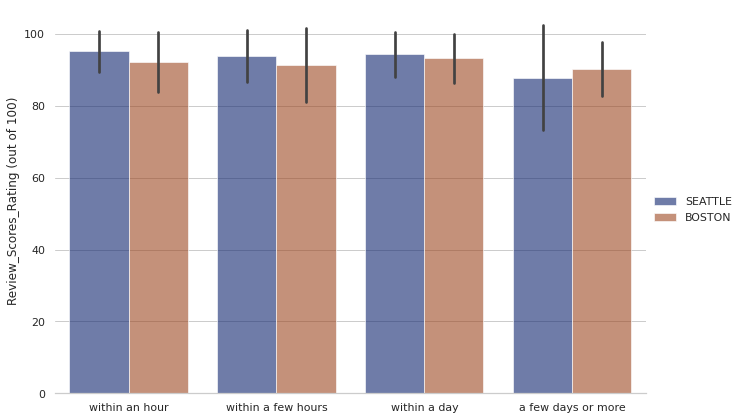

In [83]:
# cat plot for responding time

sns.set_theme(style='whitegrid')

g = sns.catplot(
        data=df_list, kind='bar',
        x='host_response_time', y='review_scores_rating', hue='city2',
        order=['within an hour', 'within a few hours', 'within a day', 'a few days or more'],
        ci='sd', palette='dark', alpha=.6, height=6, aspect=1.5,
        )

g.despine(left=True)
g.set_axis_labels("", "Review_Scores_Rating (out of 100)")
g.legend.set_title("")

<AxesSubplot:>

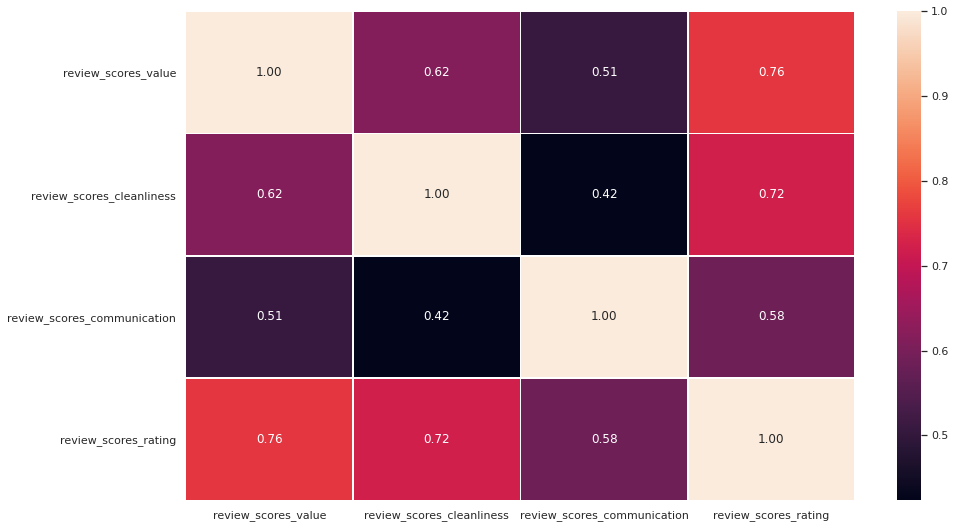

In [84]:
# heatmap of correlations selected

df_list_clean_subset = df_list_clean[['review_scores_value', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_rating']]


f, ax = plt.subplots(figsize=(15,9))
sns.heatmap(df_list_clean_subset.corr(),
            annot=True,
            fmt='0.2f',
            linewidths=.6,
            ax=ax,
           )

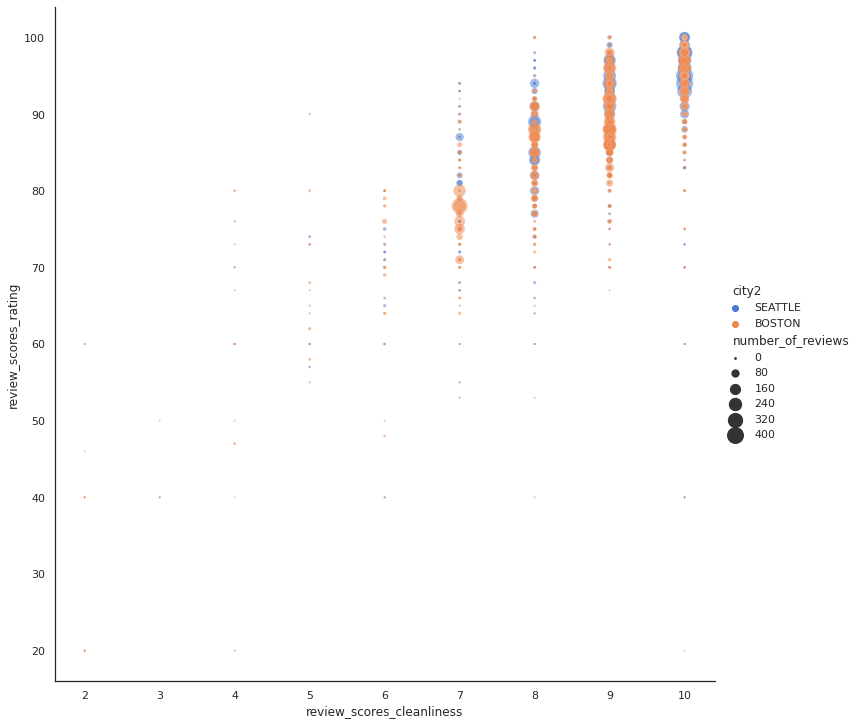

In [85]:
# cleanliness scores versus overall score by city

sns.set_theme(style='white')

sns.relplot(
            x=df_list['review_scores_cleanliness'],
            y=df_list['review_scores_rating'],
            hue=df_list['city2'],
            size=df_list['number_of_reviews'],
            sizes=(3,300),
            alpha=0.5,
            palette='muted',
            height=10,
            data='df_list',
            )

# Conclusions

## Question 1
### What actions can a host take to achieve a better overall rating score?
There are many things hosts can do that should improve their overall rating score.  Aside from the obvious 'get better ratings on all the sub-categories' (see Question 2) there are clear actions that can be taken that should make a difference.

#### Three very simple things that stand out from the data:
* Respond to your guests as soon as you can - certainly within one day.  For hosts responding within 'a few days or more' there is a clear penalty in the overall review scores.
* Keep your calendar up to date - this small task has a high predictive value on the overall rating score.  Leave your calendar for 4 months between updates and you are likely to be penalised in the reviews, whereas if you have updated it in the last two days it is likely that your review score will be better.  Why this is the case is uncertain, but could well be linked to your overall levels of communication and accuracy which give guests a better overall experience.
* Verify your identity and require your guests to verify their phone number.  These two items both link strongly with a higher overall review score and are both very simple housekeeping tasks to take care of.  Perhaps these are also linked to making sure the overall communication is stronger between host and guest.




## Question 2
### From the sub-category review scores, which ones have the strongest impact on overall rating score?
From the review sub-category scores, the strongest influencer of overall review scores rating seems to be for 'value'.  This suggests a host needs to get their pricing and their offering in line with what visitors expect for accommodation that they would rate as being 'great value'.  It has the highest coefficient for predicting the overall review scores rating.  

The second highest predictor in terms of sub-categories is the 'cleanliness' score. A very simple thing to get right, and clearly reflected in the overall rating for the property.

Close behind, in third position, is 'communication'.  Another simple one for hosts to take action and improve, for a better overall rating score.




## Question 3
### How do the drivers of overall rating differ by city between Seattle and Boston?
Looking at the two cities independently, the overall key drivers were mostly the same.  The same message of: 'communicate with your guests', 'keep your property (and your Airbnb profile) clean' and 'offer good value' should help drive better ratings in both cities.

A few things stand out as different between the cities:
* The penalty seems to be higher in Seattle for slow responsiveness in communication.
* For all 'cleanliness' scores below the best possible rating of 10, Boston seems to have a higher penalty with lower overall ratings than Seattle for the lower cleanliness scores.